## **Cifar 100 Classification**
This is a an image classification problem solved using a Sequential Keras model.

In [31]:
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

### Step 1
Read in the dataset as a dataframe, and explore the data. Understanding the shape of our data will be crucial for creating our model architecture.

In [32]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data("fine")

print("X_train.shape:",X_train.shape)
print("y_train.shape:",y_train.shape)
print("X_test.shape:",X_test.shape)
print("y_test.shape:",y_test.shape)
class_names = ['apple', 'aquarium_fish','baby','bear','beaver',
               'bed','bee','beetle','bicycle','bottle','bowl',
               'boy','bridge','bus','butterfly','camel','can','castle',
               'caterpillar','cattle','chair','chimpanzee','clock','cloud',
               'cockroach','couch','crab','crocodile','cup','dinosaur','dolphin',
               'elephant','flatfish','forest','fox','girl','hamster','house',
               'kangaroo','keyboard','lamp','lawn_mower','leopard','lion',
               'lizard','lobster','man','maple_tree','motorcycle','mountain',
               'mouse','mushrrom','oak_tree','orange','orchid','otter','palm_tree',
               'pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine',
               'possum','rabbit','raccoon','ray','road','rocket','rose','sea',
               'seal','shark','shrew','skunk','skyscraper','snail','snake',
               'spider','squirrel','streetcar','sunflower','sweet_pepper',
               'table','tank','telephone','television','tiger','tractor',
               'train','trout','tulip','turtle','wardrobe','whale','willow_tree',
               'wolf','woman','worm']

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


Print out the first 30 images to get an understanding of the images that we are classifying.

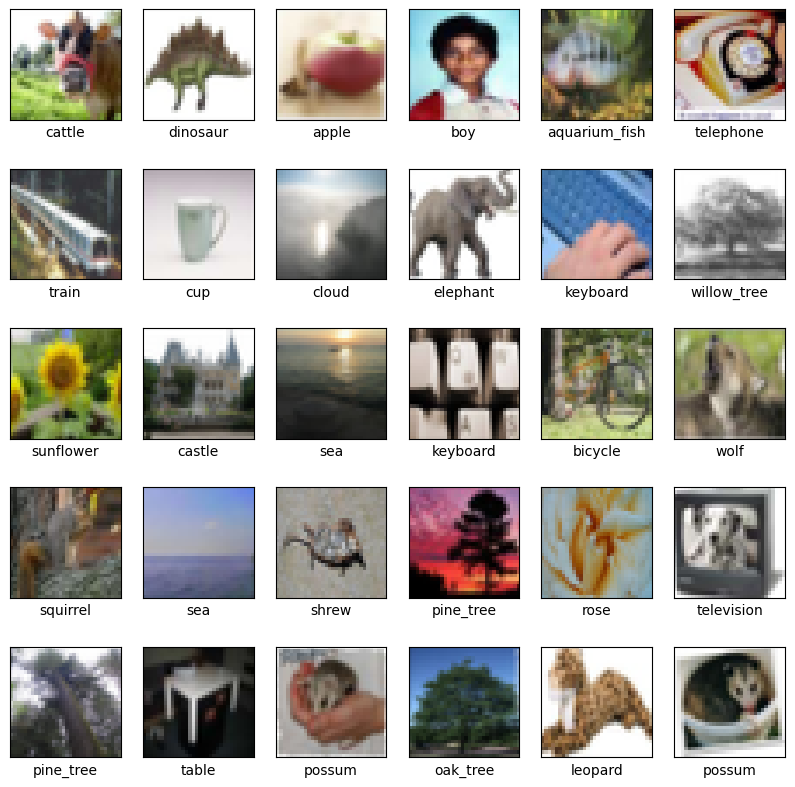

In [33]:
plt.figure(figsize=[10,10])
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i,0]])
plt.show()

### Step 2
Prepare the data.

First, convert the X data to float for one-hot encoding.

In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Next, scale the data.

In [35]:
X_train /= 255
X_test /= 255

Then create dummy variables for the categorical classes using the to_categorical method. This will be required to run the cross-entropy loss function later on.

In [36]:
n_classes = 100
print('Shape before one-hot encoding: ',y_train.shape)
Y_train = to_categorical(y_train,n_classes)
Y_test = to_categorical(y_test,n_classes)
print('Shape after one-hot encoding: ', Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 100)


### Step 3
Build a stack of layers with the sequential model.
The different layers we can utilize are:
- Conv2D
 - A filter/kernel "slides" over the 2D data to perform element-wise multiplication.
- MaxPool2D
 - Downsamples the input along is spatial dimensions by taking the maximum value over an input window.
- Dropout
 - Randomly deactivates some inputs to prevent overfitting
- Flatten
 - Reshapes the output into a dimensional vector, and is used to transition from a convolution layer to a fully connected layer.
- Dense
 - Performs a linear operation on the layer's input vector (dot product).

In [37]:
model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',
                 input_shape=(32,32,3)))
model.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(.25))

model.add(Conv2D(512,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(.3))

#output
model.add(Dense(100,activation='softmax'))

We can then run a model.summary() to print out information about the layers.

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 256)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 256)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 512)       1180160   
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 512)         0         
 g2D)                                                 

### Step 4
Compile and train the model.

For the compiling step, we must choose our loss function. For our case, we will be using a categorical_crossentropy loss function.

For the training step, we must set certain parameters relating to the epoch. An epoch is the training of the neural network with all the training data for one cycle. The batch_size determines the number of samples we use in one epoch, while the epoch parameter sets the number of epochs the model will run.

In [ ]:
#compile
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#train
history=model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
280/782 [=========>....................] - ETA: 20s - loss: 4.4910 - accuracy: 0.0194

### Step 5

Analyze the model by looking at the loss curve and the accuracy curve.

In [ ]:
#loss curve
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'],'black',linewidth=2.0)
plt.plot(history.history['val_loss'],'green',linewidth=2.0)
plt.legend(['Training Loss','Validation Loss'],fontsize=14)
plt.xlabel('Epochs',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=12)

#accuracy curve
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'],'black',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'blue',linewidth=2.0)
plt.legend(['Training Accuracy','Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curve',fontsize=12)


### Step 6
Making actual predictions

Now that we have a working model, we can make actual predictions. \
We must note here that when we predict from the model, we must use argmax to convert into a label index, and then input the label index into the class_names list to get the actual categorical label.

In [ ]:
#predictions
pred=model.predict(X_test)
# convert into label index
pred_classes=np.argmax(pred, axis=1)

#plot actual vs predicted for the first 30 labels.
plt.figure(figsize=[15,15])
for i in range (30):
  plt.subplot(5,6,i+1).imshow(X_test[i])
  plt.subplot(5,6,i+1).set_title("True: %s \nPredict: %s" %
                                 (class_names[y_test[i,0]],
                                  class_names[pred_classes[i]]))
  plt.subplot(5,6,i+1).axis('off')

plt.subplots_adjust(hspace=1)
plt.show()

If we want to look at just the misclassified labels, we can run the following.

In [ ]:
#misclassified results
failed_indices = []
idx =0

for i in y_test:
  if i[0] != pred_classes[idx]:
    failed_indices.append(idx)
  idx=idx+1

plt.figure(figsize=[15,15])

for i in range(30):
  # for first 30 use
  # failed_index = failed_indices[i]
  random_select = np.random.randint(0,len(failed_indices))
  failed_index = failed_indices[random_select]
  plt.subplot(5,6,i+1).imshow(X_test[failed_index])
  plt.subplot(5,6,i+1).set_title("True: %s \nPredict: %s" %
                                 (class_names[y_test[failed_index,0]],
                                  class_names[pred_classes[failed_index]]))
  plt.subplot(5,6,i+1).axis('off')

plt.subplots_adjust(hspace=1)
plt.show()